In [50]:

import time
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve,accuracy_score
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import  classification_report


# Dataset for Bole District

In [51]:
#Reading a CSV file named 'dataB.csv' and loading it into the DataFrame(importing data) 

df1 = pd.read_csv('dataB.csv')

In [52]:
df1['Date'] = pd.to_datetime(df1["Years"].astype(str) + '-' \
                             + df1['Months'].astype(str) + '-' + df1['Days'].astype(str))

df1.head()

,Days,Months,Years,TAVG (Degrees Fahrenheit)...5,TAVG (Degrees Celsius),TMAX (Degrees Fahrenheit)...6,TMAX (Degrees Celsius),TMIN (Degrees Fahrenheit)...7,TMIN (Degrees Celsius),PRCP (Inches),PRCP(mm),SNOW (Inches),SNWD (Inches),Date
0,1,1,1973,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,NaN,1973-01-01
1,2,1,1973,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,NaN,1973-01-02
2,3,1,1973,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,NaN,1973-01-03
3,4,1,1973,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,NaN,1973-01-04
4,5,1,1973,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,#VALUE!,NaN,NaN,1973-01-05


Missing data count in 'Days' column: 0
Missing data count in 'Months' column: 0
Missing data count in 'Years' column: 0
Missing data count in 'TAVG (Degrees Fahrenheit)...5' column: 0
Missing data count in 'TMAX (Degrees Fahrenheit)...6' column: 0
Missing data count in 'TMIN (Degrees Fahrenheit)...7' column: 0
Missing data count in 'PRCP (Inches)' column: 0


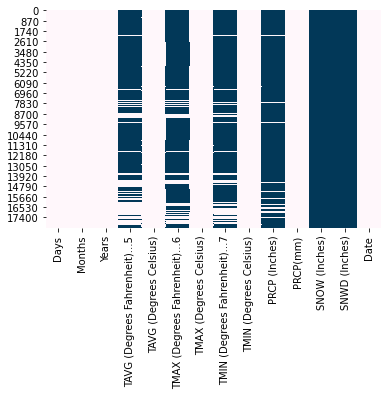

In [53]:

#checking the missing data pattern in the dataset.
sns.heatmap(df1.isnull(), cbar=False, cmap='PuBu')


total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


# Set values to 0 for rows with months 11, 12, 01, 02, and 03
df1.loc[df1['Months'].isin([11, 12, 1, 2]), 'PRCP (Inches)'] = 0

#
#Filling missing values by using the mode of each column to fill missing values in specific columns.
df1['TMAX (Degrees Fahrenheit)...6'] = df1['TMAX (Degrees Fahrenheit)...6'].fillna(df1['TMAX (Degrees Fahrenheit)...6'].mode()[0])
df1['TMIN (Degrees Fahrenheit)...7'] = df1['TMIN (Degrees Fahrenheit)...7'].fillna(df1['TMIN (Degrees Fahrenheit)...7'].mode()[0])
df1['TAVG (Degrees Fahrenheit)...5'] = df1['TAVG (Degrees Fahrenheit)...5'].fillna(df1['TAVG (Degrees Fahrenheit)...5'].mode()[0])
df1['PRCP (Inches)'] = df1['PRCP (Inches)'].fillna(df1['PRCP (Inches)'].mode()[0])



#Removes specified columns from the DataFrame.
columns_to_delete = ['TAVG (Degrees Celsius)','TMAX (Degrees Celsius)', 'TMIN (Degrees Celsius)', 'PRCP(mm)', 'SNOW (Inches)', 'SNWD (Inches)']

# Delete the columns
df1.drop(columns=columns_to_delete, inplace=True)



#Calculates the number of missing values in specific columns and prints the count.
column_name = 'Days'
missing_count = df1['Days'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))


column_name = 'Months'
missing_count = df1['Months'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))


column_name = 'Years'
missing_count = df1['Years'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))


column_name = 'TAVG (Degrees Fahrenheit)...5'
missing_count = df1['TAVG (Degrees Fahrenheit)...5'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))


column_name = 'TMAX (Degrees Fahrenheit)...6'
missing_count = df1['TMAX (Degrees Fahrenheit)...6'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))


column_name = 'TMIN (Degrees Fahrenheit)...7'
missing_count = df1['TMIN (Degrees Fahrenheit)...7'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))


column_name = 'PRCP (Inches)'
missing_count = df1['PRCP (Inches)'].isnull().sum()
print("Missing data count in '{}' column: {}".format(column_name, missing_count))



#Converts temperature and precipitation values to different units and creates new columns with transformed values.
df1["TAVG (Degrees Fahrenheit)...5_DC"] = (df1["TAVG (Degrees Fahrenheit)...5"] - 32) * 5/9
df1["TMAX (Degrees Fahrenheit)...6_DC"] = (df1["TMAX (Degrees Fahrenheit)...6"] - 32) * 5/9
df1["TMIN (Degrees Fahrenheit)...7_DC"] = (df1["TMIN (Degrees Fahrenheit)...7"] - 32) * 5/9
df1["PRCP (mm)"]=(df1["PRCP (Inches)"])*24.5


#Renaming the selected columns
df1.rename(columns={'TAVG (Degrees Fahrenheit)...5_DC': 'TAVG(Degrees Celsius)'}, inplace=True)
df1.rename(columns={'TMAX (Degrees Fahrenheit)...6_DC': 'TMAX(Degrees Celsius)'}, inplace=True)
df1.rename(columns={'TMIN (Degrees Fahrenheit)...7_DC': 'TMIN(Degrees Celsius)'}, inplace=True)

# Round the values in the DataFrame to two decimal places
df1 = df1.round(2)




# Monthly rainfall plots

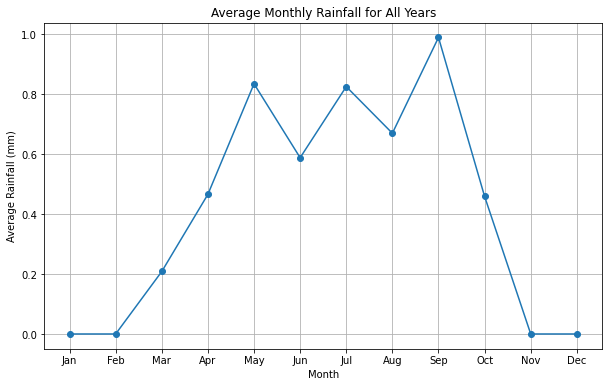

In [54]:
# Convert the 'Date' column to a datetime object
df1['Date'] = pd.to_datetime(df1['Date'])

# Set the 'Date' column as the DataFrame index
df1.set_index('Date', inplace=True)

# Calculate the average monthly rainfall for all the years
average_monthly_rainfall = df1['PRCP (mm)'].groupby(df1.index.month).mean()


# Plot the average monthly rainfall
plt.figure(figsize=(10, 6))
plt.plot(average_monthly_rainfall.index, average_monthly_rainfall.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Monthly Rainfall for All Years')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Annual rainfall plots

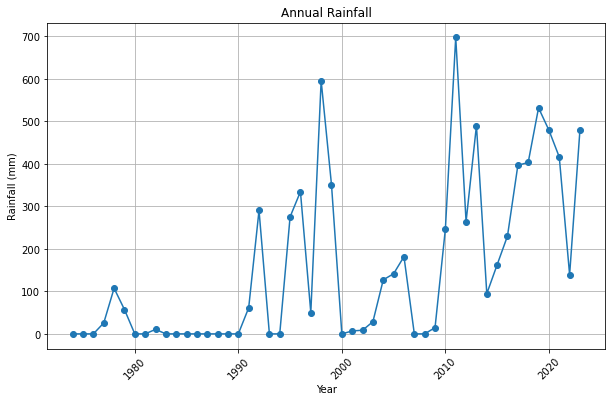

In [55]:
# Resample the data to annual rainfall
annual_rainfall = df1['PRCP (mm)'].resample('Y').sum()

# Plot annual rainfall
plt.figure(figsize=(10, 6))
plt.plot(annual_rainfall.index, annual_rainfall.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Annual Rainfall')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [56]:
#Removes previously transformed columns and the original precipitation column.
columns_to_delete = ['TAVG (Degrees Fahrenheit)...5','TMAX (Degrees Fahrenheit)...6','Days', 'Months','Years','TMIN (Degrees Fahrenheit)...7']

# Delete the columns
df1.drop(columns=columns_to_delete, inplace=True)
df1= df1.drop('PRCP (Inches)', axis=1)

missing.head()

,Total,Percent
SNWD (Inches),18262,1.000000
SNOW (Inches),18262,1.000000
PRCP (Inches),17055,0.933906
TMIN (Degrees Fahrenheit)...7,15777,0.863925
TMAX (Degrees Fahrenheit)...6,15605,0.854507


In [57]:
def convert_column_to_binary(data, column_name, threshold):
    data[column_name] = data[column_name].apply(lambda x: 1 if x >= threshold else 0)
    return data

data = df1

threshold = 0.2
column_name = 'PRCP (mm)'

df1 = convert_column_to_binary(data, column_name, threshold)

In [58]:
# Separate features (X) and target variable (y)
X = df1.drop('PRCP (mm)', axis=1)  # Adjust 'target_variable' with the name of your target variable column
y = df1['PRCP (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X_train and y_train into a single DataFrame
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority_class = train_data[train_data['PRCP (mm)'] == 0]
minority_class = train_data[train_data['PRCP (mm)'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the majority class samples
                              random_state=42)

# Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,  # No replacement
                                n_samples=len(minority_class),  # Match the minority class samples
                                random_state=42)

# Combine the upsampled minority class with the downsampled majority class
balanced_data = pd.concat([majority_downsampled, minority_upsampled])

df1

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
Date,,,,
1973-01-01,25.56,32.22,22.22,0
1973-01-02,25.56,32.22,22.22,0
1973-01-03,25.56,32.22,22.22,0
1973-01-04,25.56,32.22,22.22,0
1973-01-05,25.56,32.22,22.22,0
...,...,...,...,...
2022-12-27,28.33,35.00,20.00,0
2022-12-28,28.33,36.67,21.67,0
2022-12-29,27.78,36.11,19.44,0


In [59]:
df1 = balanced_data 

In [60]:
# Split the data into input features (X) and target variable (y)
X = data.drop('PRCP (mm)', axis=1)  # Assuming 'rainfall_occurrence' is the target variable
y = data['PRCP (mm)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [61]:
df1
#14609//5

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
Date,,,,
1974-08-28,25.56,32.22,22.22,0
2013-07-07,25.56,32.22,22.22,0
1976-09-24,26.67,30.00,22.22,0
2003-08-03,25.56,32.22,22.22,0
2012-09-05,25.00,29.44,22.22,0
...,...,...,...,...
1976-10-15,27.78,32.22,21.11,1
1997-07-16,23.89,26.67,20.00,1
1998-06-26,27.22,32.22,21.67,1


# ANNs

In [62]:
import torch
import torch.nn as nn

class RainfallModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RainfallModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Define the model architecture and hyperparameters
input_size = X_train_tensor.shape[1]
hidden_size = 64
model = RainfallModel(input_size, hidden_size)

In [63]:
criterion = nn.BCELoss()  # Binary cross-entropy loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

Epoch [5/1000], Loss: 0.4360
Epoch [10/1000], Loss: 0.2743
Epoch [15/1000], Loss: 0.1982
Epoch [20/1000], Loss: 0.1671
Epoch [25/1000], Loss: 0.1506
Epoch [30/1000], Loss: 0.1355
Epoch [35/1000], Loss: 0.1217
Epoch [40/1000], Loss: 0.1202
Epoch [45/1000], Loss: 0.1181
Epoch [50/1000], Loss: 0.1151
Epoch [55/1000], Loss: 0.1150
Epoch [60/1000], Loss: 0.1129
Epoch [65/1000], Loss: 0.1121
Epoch [70/1000], Loss: 0.1110
Epoch [75/1000], Loss: 0.1101
Epoch [80/1000], Loss: 0.1093
Epoch [85/1000], Loss: 0.1083
Epoch [90/1000], Loss: 0.1074
Epoch [95/1000], Loss: 0.1063
Epoch [100/1000], Loss: 0.1053
Epoch [105/1000], Loss: 0.1041
Epoch [110/1000], Loss: 0.1030
Epoch [115/1000], Loss: 0.1020
Epoch [120/1000], Loss: 0.1011
Epoch [125/1000], Loss: 0.1002
Epoch [130/1000], Loss: 0.0994
Epoch [135/1000], Loss: 0.0986
Epoch [140/1000], Loss: 0.0978
Epoch [145/1000], Loss: 0.0970
Epoch [150/1000], Loss: 0.0963
Epoch [155/1000], Loss: 0.0956
Epoch [160/1000], Loss: 0.0949
Epoch [165/1000], Loss: 0.09

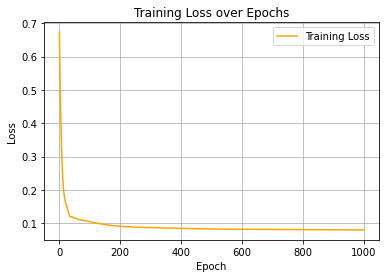

In [64]:
import matplotlib.pyplot as plt

# Lists to store loss and evaluation metrics during training
losses = []

# Set the number of training epochs
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss for plotting
    losses.append(loss.item())

    # Print the loss for every few epochs
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the loss during training
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss', color= 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Test Accuracy: 0.9458
Precision_nn: 0.3220
Recall_nn: 0.5280
F1-score_nn: 0.4000
AUC-ROC_nn: 0.9281
Time taken_nn = 7.152557373046875e-07


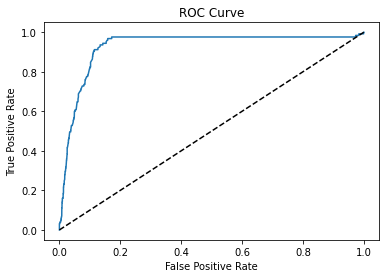

In [65]:
# Evaluate the model on the test set
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    predicted_probs = outputs.numpy()
    predicted_labels = (predicted_probs > 0.2).astype(int)
    accuracy_nn = (predicted_labels == y_test_tensor.numpy().reshape(-1, 1)).mean()
    print(f'Test Accuracy: {accuracy_nn:.4f}')

    
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    predicted_probs = outputs.numpy()
    predicted_labels = (predicted_probs > 0.2).astype(int)
    true_labels = y_test_tensor.numpy().reshape(-1, 1)

    # Calculate precision
    precision_nn = precision_score(true_labels, predicted_labels)

    # Calculate recall
    recall_nn = recall_score(true_labels, predicted_labels)

    # Calculate F1-score
    f1_nn = f1_score(true_labels, predicted_labels)

    # Calculate AUC-ROC
    auc_roc_nn = roc_auc_score(true_labels, predicted_probs)

    # Get ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probs)
    
    # Run time
    t0=time.time()
    time_taken_nn = time.time()-t0

    
print(f"Precision_nn: {precision_nn:.4f}")
print(f"Recall_nn: {recall_nn:.4f}")
print(f"F1-score_nn: {f1_nn:.4f}")
print(f"AUC-ROC_nn: {auc_roc_nn:.4f}")
print("Time taken_nn = {}".format(time_taken_nn))


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [66]:
df1

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
Date,,,,
1974-08-28,25.56,32.22,22.22,0
2013-07-07,25.56,32.22,22.22,0
1976-09-24,26.67,30.00,22.22,0
2003-08-03,25.56,32.22,22.22,0
2012-09-05,25.00,29.44,22.22,0
...,...,...,...,...
1976-10-15,27.78,32.22,21.11,1
1997-07-16,23.89,26.67,20.00,1
1998-06-26,27.22,32.22,21.67,1


In [88]:
df1.head()

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
Date,,,,
1974-08-28,25.56,32.22,22.22,0
2013-07-07,25.56,32.22,22.22,0
1976-09-24,26.67,30.00,22.22,0
2003-08-03,25.56,32.22,22.22,0
2012-09-05,25.00,29.44,22.22,0


In [89]:
# Calculate the coefficient of variation (CV%) for each column
cv = (df1.std() / df1.mean()) * 100

# Print the CV% for each column
for column, cv_value in cv.items():
    print("CV% for column '{}': {:.2f}".format(column, cv_value))

CV% for column 'TAVG(Degrees Celsius)': 6.63
CV% for column 'TMAX(Degrees Celsius)': 6.88
CV% for column 'TMIN(Degrees Celsius)': 4.58
CV% for column 'PRCP (mm)': 17.81


In [90]:
# Calculate the coefficient of variation (CV%) for each column
cv = (df1.std() / df1.mean()) * 100

# Print the CV% for each column
for column, cv_value in cv.items():
    print("CV% for column '{}': {:.2f}".format(column, cv_value))

CV% for column 'TAVG(Degrees Celsius)': 6.63
CV% for column 'TMAX(Degrees Celsius)': 6.88
CV% for column 'TMIN(Degrees Celsius)': 4.58
CV% for column 'PRCP (mm)': 17.81


In [71]:
df1.describe()

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
count,14609.000000,14609.000000,14609.000000,14609.000000
mean,26.043734,31.371190,22.007870,0.969266
std,1.726544,2.157026,1.007351,0.172603
min,19.440000,23.330000,13.890000,0.000000
25%,25.000000,30.000000,21.670000,1.000000
50%,25.560000,32.220000,22.220000,1.000000
75%,27.220000,32.220000,22.220000,1.000000
max,32.220000,39.440000,27.220000,1.000000


In [72]:
# Rainfall data
rainfall_data = [df1]

# Calculate the median
median = np.median(rainfall_data)

# Print the result
print("Median rainfall: ", median)

Median rainfall:  23.33


In [73]:
# Rainfall data
rainfall_data = [df1]

# Calculate the median
mean = np.mean(rainfall_data)

# Print the result
print("Mean rainfall: ", mean)

Mean rainfall:  20.098014922308167


In [74]:
 #Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df1.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df1[col] = lencoders[col].fit_transform(df1[col])

In [75]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
MiceImputed = df1.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(df1)


In [77]:
MiceImputed.head()

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
Date,,,,
1974-08-28,25.56,32.22,22.22,0.0
2013-07-07,25.56,32.22,22.22,0.0
1976-09-24,26.67,30.00,22.22,0.0
2003-08-03,25.56,32.22,22.22,0.0
2012-09-05,25.00,29.44,22.22,0.0


In [78]:
MiceImputed.isna()

,TAVG(Degrees Celsius),TMAX(Degrees Celsius),TMIN(Degrees Celsius),PRCP (mm)
Date,,,,
1974-08-28,False,False,False,False
2013-07-07,False,False,False,False
1976-09-24,False,False,False,False
2003-08-03,False,False,False,False
2012-09-05,False,False,False,False
...,...,...,...,...
1976-10-15,False,False,False,False
1997-07-16,False,False,False,False
1998-06-26,False,False,False,False


 So, after MICE imputation, the dataframe does not have any "NaN" value.

<AxesSubplot:>

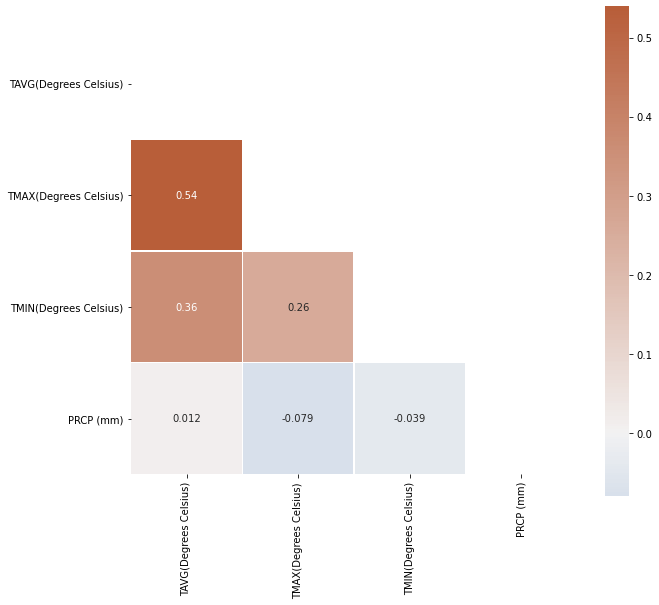

In [79]:
# Correlation Heatmap
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

However, we can dig deeper into pairwise correlation among these highly correlated features by looking at the following pairplot. There is very minimal overlap between them.

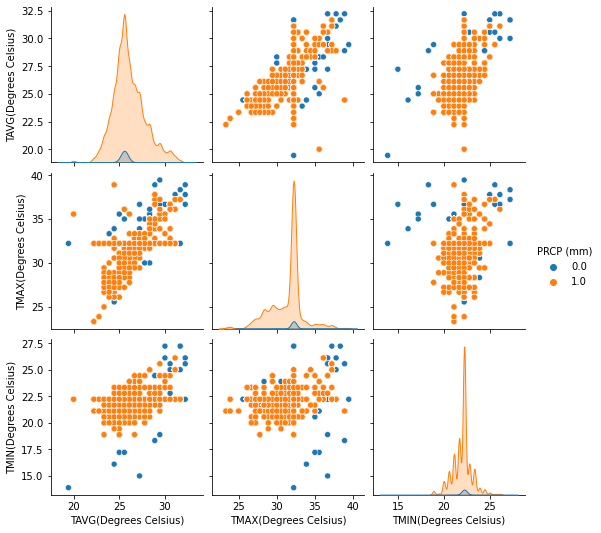

In [80]:
sns.pairplot( data=MiceImputed, vars=('TAVG(Degrees Celsius)','TMAX(Degrees Celsius)','TMIN(Degrees Celsius)'), hue='PRCP (mm)' )

# Serial Correlation

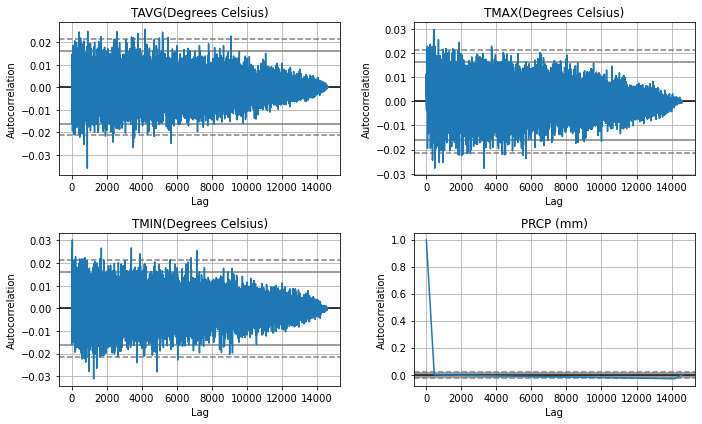

In [81]:
df1 = pd.DataFrame(df1)

# Plot autocorrelation for each variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(df1.columns):
    pd.plotting.autocorrelation_plot(df1[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [82]:
#calculating autocorrelation
autocorr_results = df1.apply(lambda x: x.autocorr())

# Output autocorrelation results
print(autocorr_results)

TAVG(Degrees Celsius)   -0.011762
TMAX(Degrees Celsius)   -0.003386
TMIN(Degrees Celsius)   -0.005078
PRCP (mm)                0.998851
dtype: float64


# Logistic Regression 

Accuracy: 0.8666849165069805
Precision: 0.15057915057915058
Recall: 0.624
AUC: 0.7480759637188209
F1-score: 0.2426127527216174
Time taken for training (seconds): 1.4758579730987549
Time taken for prediction (seconds): 0.0014388561248779297


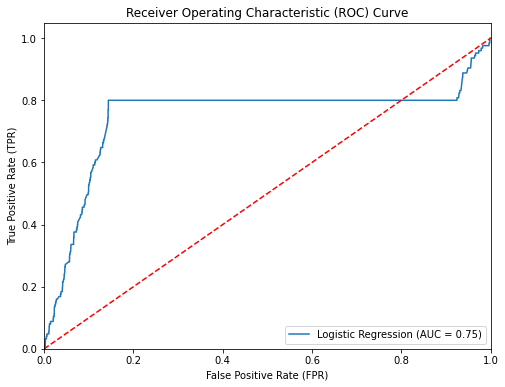

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
import time

# Assuming you have your feature matrix X and target variable y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Define the logistic regression model with desired parameters
params_lr = {
    'penalty': 'l1',       # L1 regularization
    'solver': 'liblinear', # Solver algorithm
    'C': 0.1,              # Lower regularization strength
    'max_iter': 1000,      # Maximum number of iterations
    'class_weight': 'balanced',  # Automatic adjustment of class weights
    'multi_class': 'ovr'   # One-vs-rest strategy for multiple classes
}

model_lr = LogisticRegression(**params_lr)

# Train the model and measure the time taken
start_time = time.time()
model_lr.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the test data and measure the time taken
start_time = time.time()
y_pred = model_lr.predict(X_test)
prediction_time = time.time() - start_time

y_pred_proba = model_lr.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)
print("F1-score:", f1)
print("Time taken for training (seconds):", training_time)
print("Time taken for prediction (seconds):", prediction_time)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model Comparison

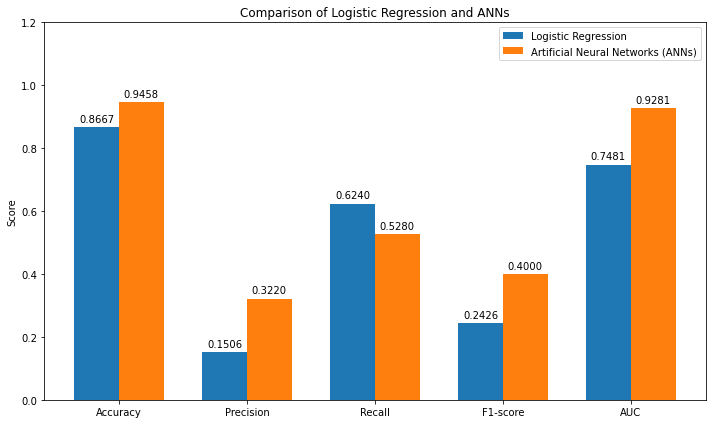

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import time


# Plotting the comparison using a bar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
logreg_scores = [accuracy, precision, recall, f1, auc]
ann_scores = [accuracy_nn, precision_nn, recall_nn, f1_nn, auc_roc_nn]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, logreg_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, ann_scores, width, label='Artificial Neural Networks (ANNs)')

ax.set_ylabel('Score')
ax.set_title('Comparison of Logistic Regression and ANNs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()

# Chi-square 

In [632]:
import scipy.stats as stats

# Create contingency table
contingency_table = pd.crosstab(df1['TAVG(Degrees Celsius)'], df1['PRCP (mm)'])

# Calculate chi-square test statistic, p-value, degrees of freedom, and expected frequencies
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Calculate Cramer's V
def cramers_v(chi2, n, dof):
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

cramers_v_value = cramers_v(chi2_statistic, contingency_table.sum().sum(), dof)

# Print the results
print("Chi-square test statistic:", chi2_statistic)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)
print("Cramer's V:", cramers_v_value)

Chi-square test statistic: 1182.4906397542723
P-value: 4.151611991502734e-238
Degrees of freedom: 20
Expected frequencies:
[[3.07344787e-02 9.69265521e-01]
 [1.04497228e+00 3.29550277e+01]
 [2.42802382e+00 7.65719762e+01]
 [6.33130262e+00 1.99668697e+02]
 [1.45066740e+01 4.57493326e+02]
 [2.35118762e+01 7.41488124e+02]
 [3.83566295e+01 1.20964337e+03]
 [6.10079403e+01 1.92399206e+03]
 [9.34328154e+01 2.94656718e+03]
 [5.12651105e+01 1.61673489e+03]
 [4.07231843e+01 1.28427682e+03]
 [3.78956123e+01 1.19510439e+03]
 [2.04691628e+01 6.45530837e+02]
 [2.13604627e+01 6.73639537e+02]
 [8.79006092e+00 2.77209939e+02]
 [1.09722089e+01 3.46027791e+02]
 [5.16339243e+00 1.62836608e+02]
 [6.94599220e+00 2.19054008e+02]
 [3.44226162e+00 1.08557738e+02]
 [1.22937915e+00 3.87706209e+01]
 [9.22034362e-02 2.90779656e+00]]
Cramer's V: 0.2820974091579609


# Cross-Validation Logistic regression

In [504]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create an instance of the model
model = LogisticRegression()

# Define the features and target variables
features = df1[['TAVG(Degrees Celsius)','TMAX(Degrees Celsius)', 'TMIN(Degrees Celsius)']]
target = np.where(df1['PRCP (mm)'] > .20, 1, 0)  # Adjust the threshold as needed

# Perform cross-validation
scores = cross_val_score(model, features, target, cv=5)  # cv specifies the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())


Cross-Validation Scores: [0.96919918 0.96919918 0.96919918 0.96919918 0.96953098]
Mean Score: 0.9692655394238564
Standard Deviation: 0.0001327215581848229


# Cross-Validation ANNs

In [505]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Create an instance of the model
model = MLPClassifier(hidden_layer_sizes=(20, 10, 5), activation='logistic', solver='lbfgs', max_iter=500)

# Define the features and target variables
features = df1[['TAVG(Degrees Celsius)', 'TMAX(Degrees Celsius)', 'TMIN(Degrees Celsius)']]
target = np.where(df1['PRCP (mm)'] > 0.20, 1, 0)  # Adjust the threshold as needed

# Perform cross-validation
scores = cross_val_score(model, features, target, cv=5)  # cv specifies the number of folds

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96919918 0.96919918 0.96919918 0.96919918 0.96953098]
Mean Score: 0.9692655394238564
Standard Deviation: 0.0001327215581848229
